# <center>**RADIOMICS ANALYSIS - Descriptive Statistics - Dates**</center>

(*Step 9.2*)

## **Radiomics Workflow:**
  
  **1. Download** DICOM images and convert to **NRRD.**

  **2.** Perform **target segmentations** and save in **NRRD.**
  
  **3.** Perform a **first Radiomic Features** ***Dummy*** **Extraction,** to:
    
  - Detect **erros in segmentations**: only one dimension, no label 1, only one segmented voxel...
  - Analyze **binwith**.


  **4. Analyze** and **correct mask errors.**

  **5. Adjust binwith.**
   - **Tune featureextractor param file.**


  **6.** Perform **final Radiomic Feature Extraction.**

  **7. Clean Radiomic Features.**

  **8. Merge** with **labels** and **clinical data.**

  **9. Descriptive Statistics.**

  **10. Inferential Statistics.**

  **11. Machine Learning.**

## **DESCRIPTIVE STATISTICS - DATES**

0. **Environment configuration.**
1. **Load data.**
    * Load data.
    * Filter patients with segmentations.
    * Select dates.
2. **Check and Convert Datatypes.**
3. **Descriptive Statistics (Stats and Plots).**

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

### **0. Environment configuration.**

#### Set the working directory

In [2]:
# Set working directory
wd = '/Users/pablomenendezfernandez-miranda/Proyecto Otosclerosis/'
os.chdir(wd)

print(f'Directorio actual: {os.getcwd()}')

# Check directory files
print(f'Directory files: {os.listdir(wd)}')

Directorio actual: /Users/pablomenendezfernandez-miranda/Proyecto Otosclerosis
Directory files: ['Tables', 'Databases', '.DS_Store', 'Episodes', 'Figures', 'Notebooks']


#### Mount Drive (if executed on Google Colab)

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

#### Print All DataFrame

In [4]:
# PRINT FULL DATAFRAME

def df_show_full(show):
  if show == True:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
  if show == False:
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

df_show_full(True)

#### Save Tables

In [5]:
# Save Table
def df_save_tab(df_tab, path, name):
  df_tab.to_excel(os.path.join(path + name + '.xlsx'))
  df_tab.to_csv(os.path.join(path + name + '.csv'))

### **1. Load data**

* Load data.
* Filter patients with segmentations.
* Select dates.

In [6]:
# Load pandas dataframe
clinical_data_dir= 'Databases/0_Otosclerosis_clinical_data.xlsx'
df_clinical= pd.read_excel(clinical_data_dir, engine='openpyxl', na_values='nan')

# Filter patients with segmentations (based on data analyzed in previous steps)
patients_without_segmentations = ['EPI_0010', 'EPI_0011', 'EPI_0013', 'EPI_0017', 'EPI_0018',
                                  'EPI_0033', 'EPI_0036', 'EPI_0039', 'EPI_0043', 'EPI_0044',
                                  'EPI_0045', 'EPI_0049', 'EPI_0050', 'EPI_0053', 'EPI_0054',
                                  'EPI_0055', 'EPI_0059', 'EPI_0065', 'EPI_0070', 'EPI_0073',
                                  'EPI_0079', 'EPI_0084', 'EPI_0098', 'EPI_0099', 'EPI_0108',
                                  'EPI_0109', 'EPI_0124', 'EPI_0125']

df_filter = df_clinical.loc[~df_clinical['EPI_CODE'].isin(patients_without_segmentations),:]

# Select dates
dates = [var for var in df_filter.columns if '_date' in var or '_Date' in var]
df_dates = df_filter [dates]

# Print data
print(dates)
print('')
print(df_dates.shape)
df_dates.head(0)

['Birth_date', 'Pre_surgical_Tonal_Audiometry_Pathological_Ear_Date', 'Temporal_Bone_CT_scan_Date', 'Surgery_Date', 'One_Week_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear', 'One_Month_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear', 'One_Year_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear']

(99, 7)


,Birth_date,Pre_surgical_Tonal_Audiometry_Pathological_Ear_Date,Temporal_Bone_CT_scan_Date,Surgery_Date,One_Week_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear,One_Month_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear,One_Year_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear


### **2. Check and Convert Datatypes**

In [7]:
# Check datatypes
df_dates.dtypes

Birth_date                                                        datetime64[ns]
Pre_surgical_Tonal_Audiometry_Pathological_Ear_Date               datetime64[ns]
Temporal_Bone_CT_scan_Date                                        datetime64[ns]
Surgery_Date                                                      datetime64[ns]
One_Week_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear     datetime64[ns]
One_Month_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear    datetime64[ns]
One_Year_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear     datetime64[ns]
dtype: object

In [8]:
# Convert datatypes
df_dates_cleaned= df_dates.astype('string').astype('datetime64[ns]')
df_dates_cleaned.dtypes

Birth_date                                                        datetime64[ns]
Pre_surgical_Tonal_Audiometry_Pathological_Ear_Date               datetime64[ns]
Temporal_Bone_CT_scan_Date                                        datetime64[ns]
Surgery_Date                                                      datetime64[ns]
One_Week_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear     datetime64[ns]
One_Month_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear    datetime64[ns]
One_Year_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear     datetime64[ns]
dtype: object

### **3. Descriptive Statistics (Stats and Plots)**

In [9]:
# Descriptive Stats for Date variables

def freq_tab_dates (df, column, decimals=2):
    
    df2= df.copy()
    table = pd.DataFrame(df2[column].dt.year.value_counts())
    table.rename(columns={'count':'count (n)'}, inplace=True)

    table['percentage (%)']= [float(round((value/sum(table['count (n)'].values.tolist())*100),decimals)) for value in table['count (n)'].values.tolist()]
    total= pd.DataFrame(data=[[sum(table['count (n)'].values.tolist()), sum(table['percentage (%)'].values.tolist())]], columns=table.columns.to_list(), index=['TOTAL'])
    table= pd.concat([table,total], axis=0)
    table= table.rename_axis(column, axis=1)
    
    return table

In [10]:
#selected_dates = ['Surgery_Date', 'Temporal_Bone_CT_scan_Date']
selected_dates = dates

idx= 1
for date in selected_dates:
    freq_tab = freq_tab_dates (df=df_dates_cleaned, column=date, decimals=2)
    df_save_tab(freq_tab, 'Tables/', '1_3_' + str(idx) + '_freq_tab_' + date)
    idx+=1
    print('\n')
    display (freq_tab)

Birth_date,count (n),percentage (%)
1973,7,7.07
1957,7,7.07
1962,7,7.07
1964,6,6.06
1968,6,6.06
1958,5,5.05
1982,4,4.04
1971,4,4.04
1960,4,4.04
1975,4,4.04


Pre_surgical_Tonal_Audiometry_Pathological_Ear_Date,count (n),percentage (%)
2022.0,22,43.14
2023.0,19,37.25
2024.0,5,9.80
2021.0,3,5.88
2019.0,1,1.96
2020.0,1,1.96
TOTAL,51,99.99


Temporal_Bone_CT_scan_Date,count (n),percentage (%)
2023,39,39.39
2022,29,29.29
2021,13,13.13
2020,6,6.06
2024,6,6.06
2019,4,4.04
2018,2,2.02
TOTAL,99,99.99


Surgery_Date,count (n),percentage (%)
2023.0,23,45.10
2022.0,17,33.33
2024.0,9,17.65
2019.0,1,1.96
2021.0,1,1.96
TOTAL,51,100.00


One_Week_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear,count (n),percentage (%)
2023.0,16,47.06
2022.0,12,35.29
2024.0,5,14.71
2019.0,1,2.94
TOTAL,34,100.00


One_Month_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear,count (n),percentage (%)
2023.0,15,36.59
2022.0,13,31.71
2024.0,11,26.83
2019.0,1,2.44
2021.0,1,2.44
TOTAL,41,100.01


One_Year_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear,count (n),percentage (%)
2023.0,15,57.69
2024.0,8,30.77
2022.0,2,7.69
2001.0,1,3.85
TOTAL,26,100.00


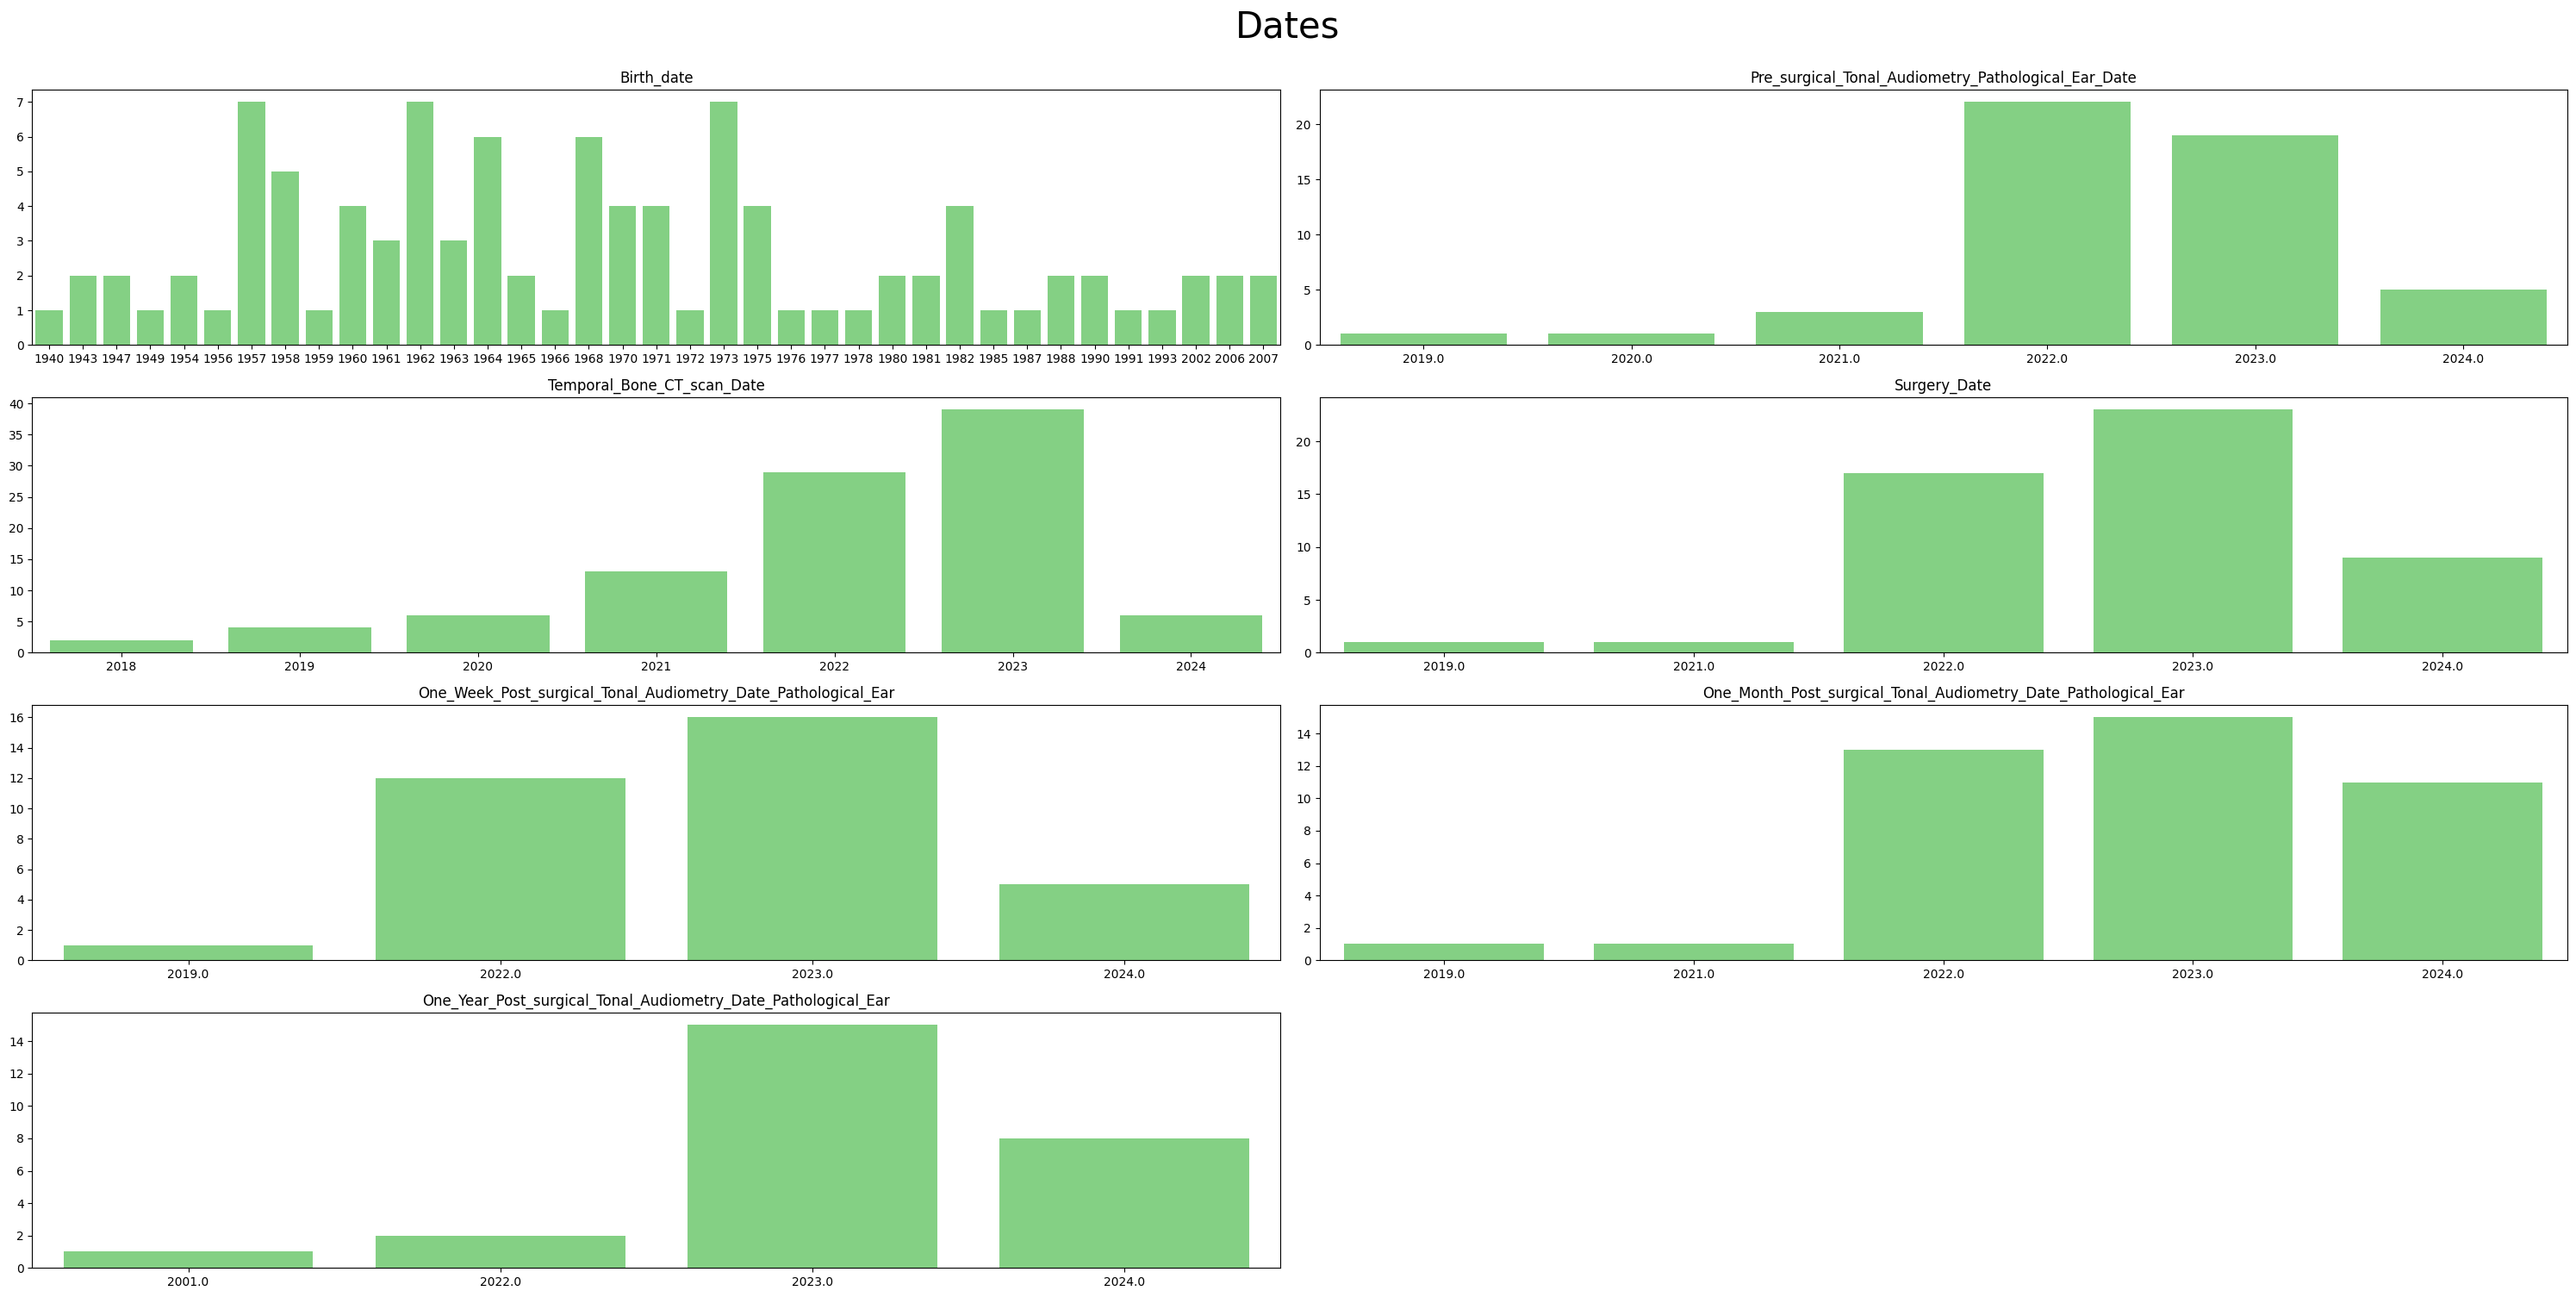

In [11]:
# Plotting Dates

df_ = df_dates_cleaned.copy()
dates_ = dates

num_vars= len(dates_)
n_cols= 2
n_rows = int(np.ceil(num_vars / n_cols))


# Create figure
fig_dates, axs= plt.subplots(n_rows, n_cols, figsize=(30,15))
fig_dates.suptitle('Dates', fontsize=30, y=1)
axes = axs.flatten()

# Create subplots
for i, date_ in enumerate(dates_):

    # Get years
    df_[date_+'year'] = df_[date_].dt.year

    # Create plot
    sns.countplot(data=df_, x=date_+'year', color='#77DD77', ax=axes[i])
    
    axes[i].set_title(date_, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)


# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig_dates.delaxes(axes[j])

# Ajust spaces and show
plt.tight_layout()
plt.show()

# Save plot
fig_dates_dir= 'Figures/'
fig_dates.savefig(fig_dates_dir + '2_3_bar_plots_all_dates.pdf', format='pdf', bbox_inches='tight', dpi=600)